<a href="https://colab.research.google.com/github/DimaKav/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

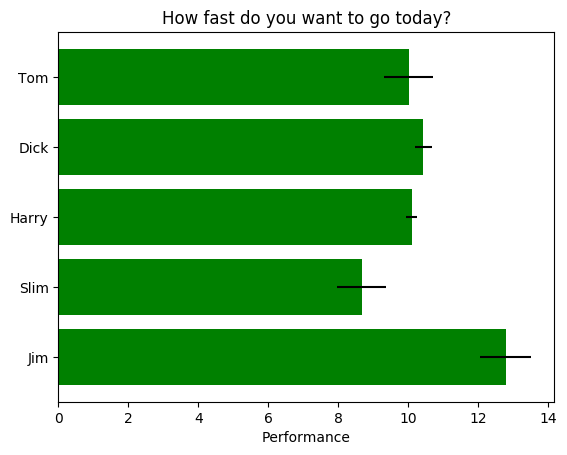

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

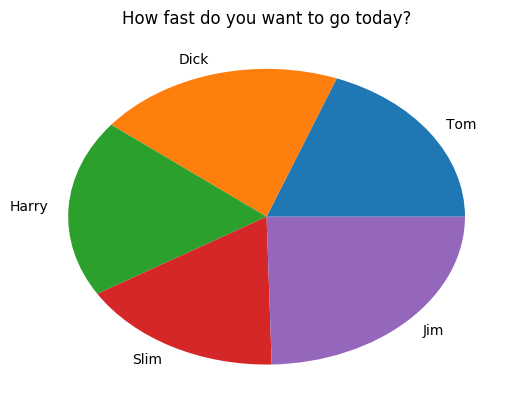

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


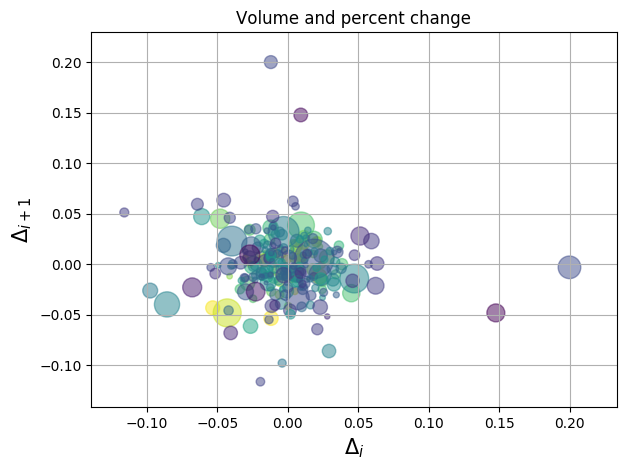

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

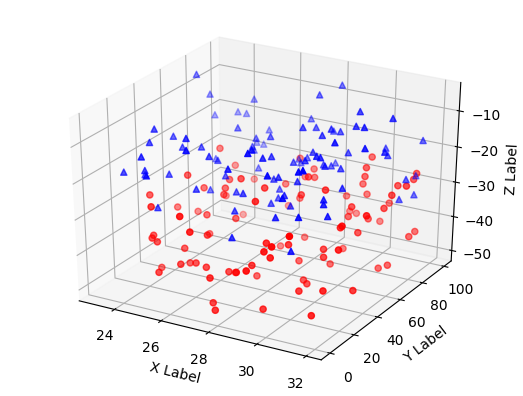

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Assignment: 

Add at least one commit to the 113 notebook, with at least 3 plots (using data you loaded yesterday, or data of your choice). At least one plot should be with matplotlib, the other two can be your choice of tool.

Stretch goals:
- Interactivity! (Bokeh, plotly)
- 3D plots that work
- Sharing/deploying your plot
- Writing a summary (~paragraph) for each plot, interpreting and describing it
- Working on your local Python setup (edited) 

Using phising websites dataset from yesterday:
https://archive.ics.uci.edu/ml/datasets/phishing+websites

In [2]:
# Data from yesterday:
# important features that have proved to be sound and effective in predicting 
# phishing websites

from scipy.io import arff
import pandas as pd

data = arff.loadarff('Training_Dataset.arff')
df = pd.DataFrame(data[0])
df = df.astype('int64')

# Features that best correlate with the result (1 phishing, -1 legit)
print(df.corr().Result.sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


In [63]:
# Frequency count plots with matplotlib

import numpy as np
import matplotlib.pyplot as plt


# Map numbers to words in df 2
# (-1=phishing,1=legitimate), (-1=legitimate, 0=suspicious, 1= phishing)
# Code citation: https://github.com/jstyczynski/Phishing_Analysis/blob/master/Phishing%20Website%20Classification%20Analysis.ipynb

df_lists = []
for i in df.columns:
    x = df["%s" % i].tolist()
    if 0 not in x:
        for n,i in enumerate(x):
            if i==-1:
                x[n]='phishing'
            elif i==1:
                x[n]='legitimate'
    elif 0 in x:
        for n,i in enumerate(x):
            if i==-1:
                x[n]='legitimate'
            elif i==1:
                x[n]='suspicious'
            else:
                x[n]='phishing'
    df_lists.append(x)
    
headers = ['having_IP_Address', 'URL_Length', 'Shortining_Service', 
           'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 
           'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
           'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 
           'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 
           'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 
           'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 
           'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 
           'Result']
df2 = pd.DataFrame(df_lists)
df2 = df2.transpose()
df2.columns = headers
df2.head()    


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,phishing,suspicious,legitimate,legitimate,phishing,phishing,legitimate,legitimate,phishing,legitimate,...,legitimate,legitimate,phishing,phishing,legitimate,phishing,legitimate,suspicious,phishing,phishing
1,legitimate,suspicious,legitimate,legitimate,legitimate,phishing,phishing,suspicious,phishing,legitimate,...,legitimate,legitimate,phishing,phishing,phishing,phishing,legitimate,suspicious,legitimate,phishing
2,legitimate,phishing,legitimate,legitimate,legitimate,phishing,legitimate,legitimate,phishing,legitimate,...,legitimate,legitimate,legitimate,phishing,suspicious,phishing,legitimate,phishing,phishing,phishing
3,legitimate,phishing,legitimate,legitimate,legitimate,phishing,legitimate,legitimate,legitimate,legitimate,...,legitimate,legitimate,phishing,phishing,suspicious,phishing,legitimate,legitimate,legitimate,phishing
4,legitimate,phishing,phishing,legitimate,legitimate,phishing,suspicious,suspicious,phishing,legitimate,...,phishing,legitimate,phishing,phishing,phishing,phishing,legitimate,suspicious,legitimate,legitimate


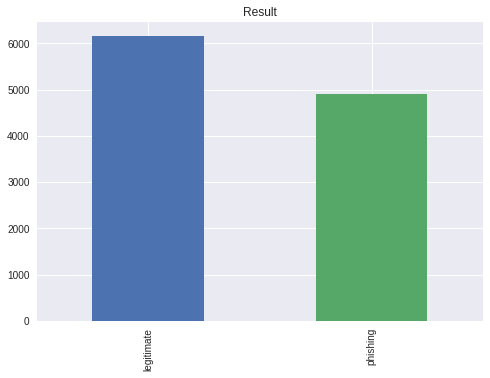

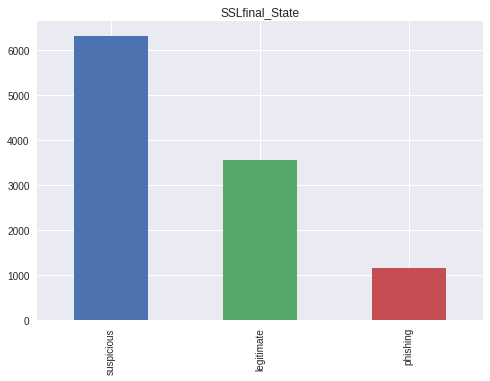

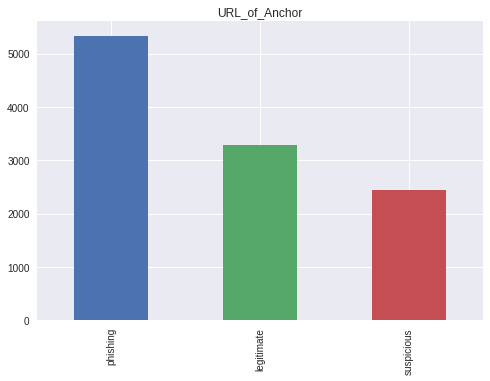

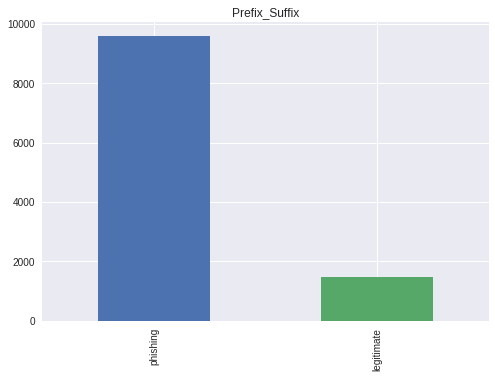

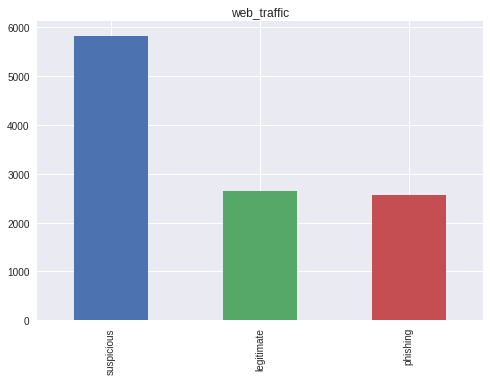

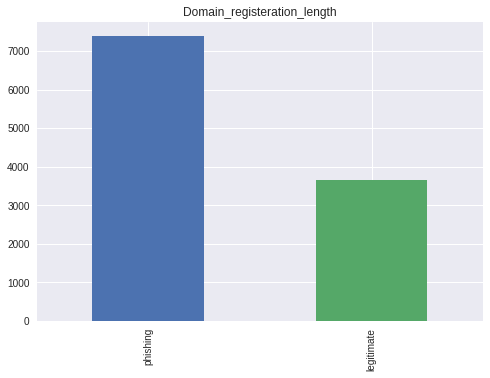

In [64]:
# Get frequency plot for top 6 most correlated columns

col_list = ['Result', 'SSLfinal_State', 'URL_of_Anchor', 'Prefix_Suffix',
            'web_traffic', 'Domain_registeration_length']

for i in col_list:
  fig, ax = plt.subplots()
  plt.title(i)
  df2[i].value_counts().plot(ax=ax, kind='bar')

In [0]:
# Make plotly work
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [61]:
# 3D Plot with Plotly that works

import plotly.plotly as py
py.sign_in('dimakav', 'zB7fHCvksJrOoSdPb0xg')
import plotly.graph_objs as go

import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dimakav/0 or inside your plot.ly account where it is named 'simple-3d-scatter'
